In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# 데이터 로딩
file_path = "C:/Users/Lenovo/Desktop/week5/car_evaluation.csv"

df = pd.read_csv(file_path)

print(df)
print(df.columns)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]
Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [5]:
df.columns = ["buying", "maint", "doors", "persons", "lug_capacity", "safety", "class"]
print(df.columns)
print(df.head())

Index(['buying', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'class'],
      dtype='object')
  buying  maint doors persons lug_capacity safety  class
0  vhigh  vhigh     2       2        small    med  unacc
1  vhigh  vhigh     2       2        small   high  unacc
2  vhigh  vhigh     2       2          med    low  unacc
3  vhigh  vhigh     2       2          med    med  unacc
4  vhigh  vhigh     2       2          med   high  unacc


In [7]:
# 결측치 확인
df.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
class           0
dtype: int64

In [9]:
# 레이블 확인
print(df['class'].value_counts())

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [11]:
label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # 각 컬럼을 숫자로 변환
    label_encoders[col] = le  # 변환기 저장 (나중에 역변환 가능)

print(df.head())  # 변환된 데이터 확인

   buying  maint  doors  persons  lug_capacity  safety  class
0       3      3      0        0             2       2      2
1       3      3      0        0             2       0      2
2       3      3      0        0             1       1      2
3       3      3      0        0             1       2      2
4       3      3      0        0             1       0      2


In [13]:
X=df.drop('class',axis=1)
X.head()

,buying,maint,doors,persons,lug_capacity,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [15]:
y=df['class']
y.value_counts()

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [17]:
Y = pd.get_dummies(y).values
X = X.values
X

array([[3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [19]:
Y

array([[False, False,  True, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False,  True, False, False],
       [False, False, False,  True]])

In [21]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((1381, 6), (1381, 4), (346, 6), (346, 4))

In [27]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(6,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,548 (17.77 KB)

 Trainable params: 4,548 (17.77 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6591 - loss: 0.4336 - val_accuracy: 0.7122 - val_loss: 0.2851
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6880 - loss: 0.2915 - val_accuracy: 0.7122 - val_loss: 0.2815
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.2769 - val_accuracy: 0.7770 - val_loss: 0.2663
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.2762 - val_accuracy: 0.7410 - val_loss: 0.2373
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7668 - loss: 0.2270 - val_accuracy: 0.8058 - val_loss: 0.2103
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8088 - loss: 0.2073 - val_accuracy: 0.7266 - val_loss: 0.2618
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.2115 - val_accuracy: 0.8273 - val_loss: 0.2073
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.1558 - val_accuracy: 0.7626 - val_loss:

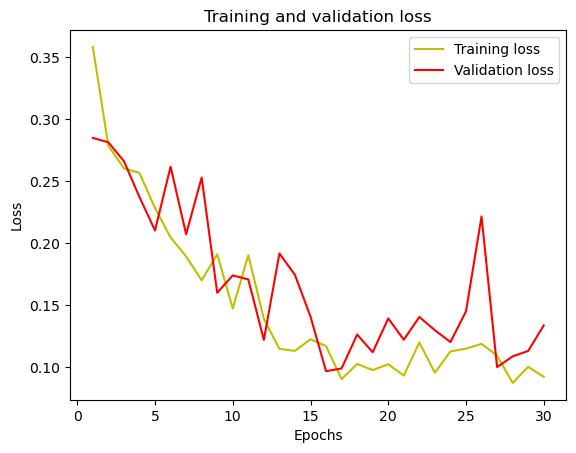

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8455 - loss: 0.1319 


[0.12705199420452118, 0.8699421882629395]